<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


In [43]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import scipy
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [10]:
sf = pd.read_csv('C:/Users/Brian/Documents/Jupyter Notebooks/project3/assessor_value_cleaned.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

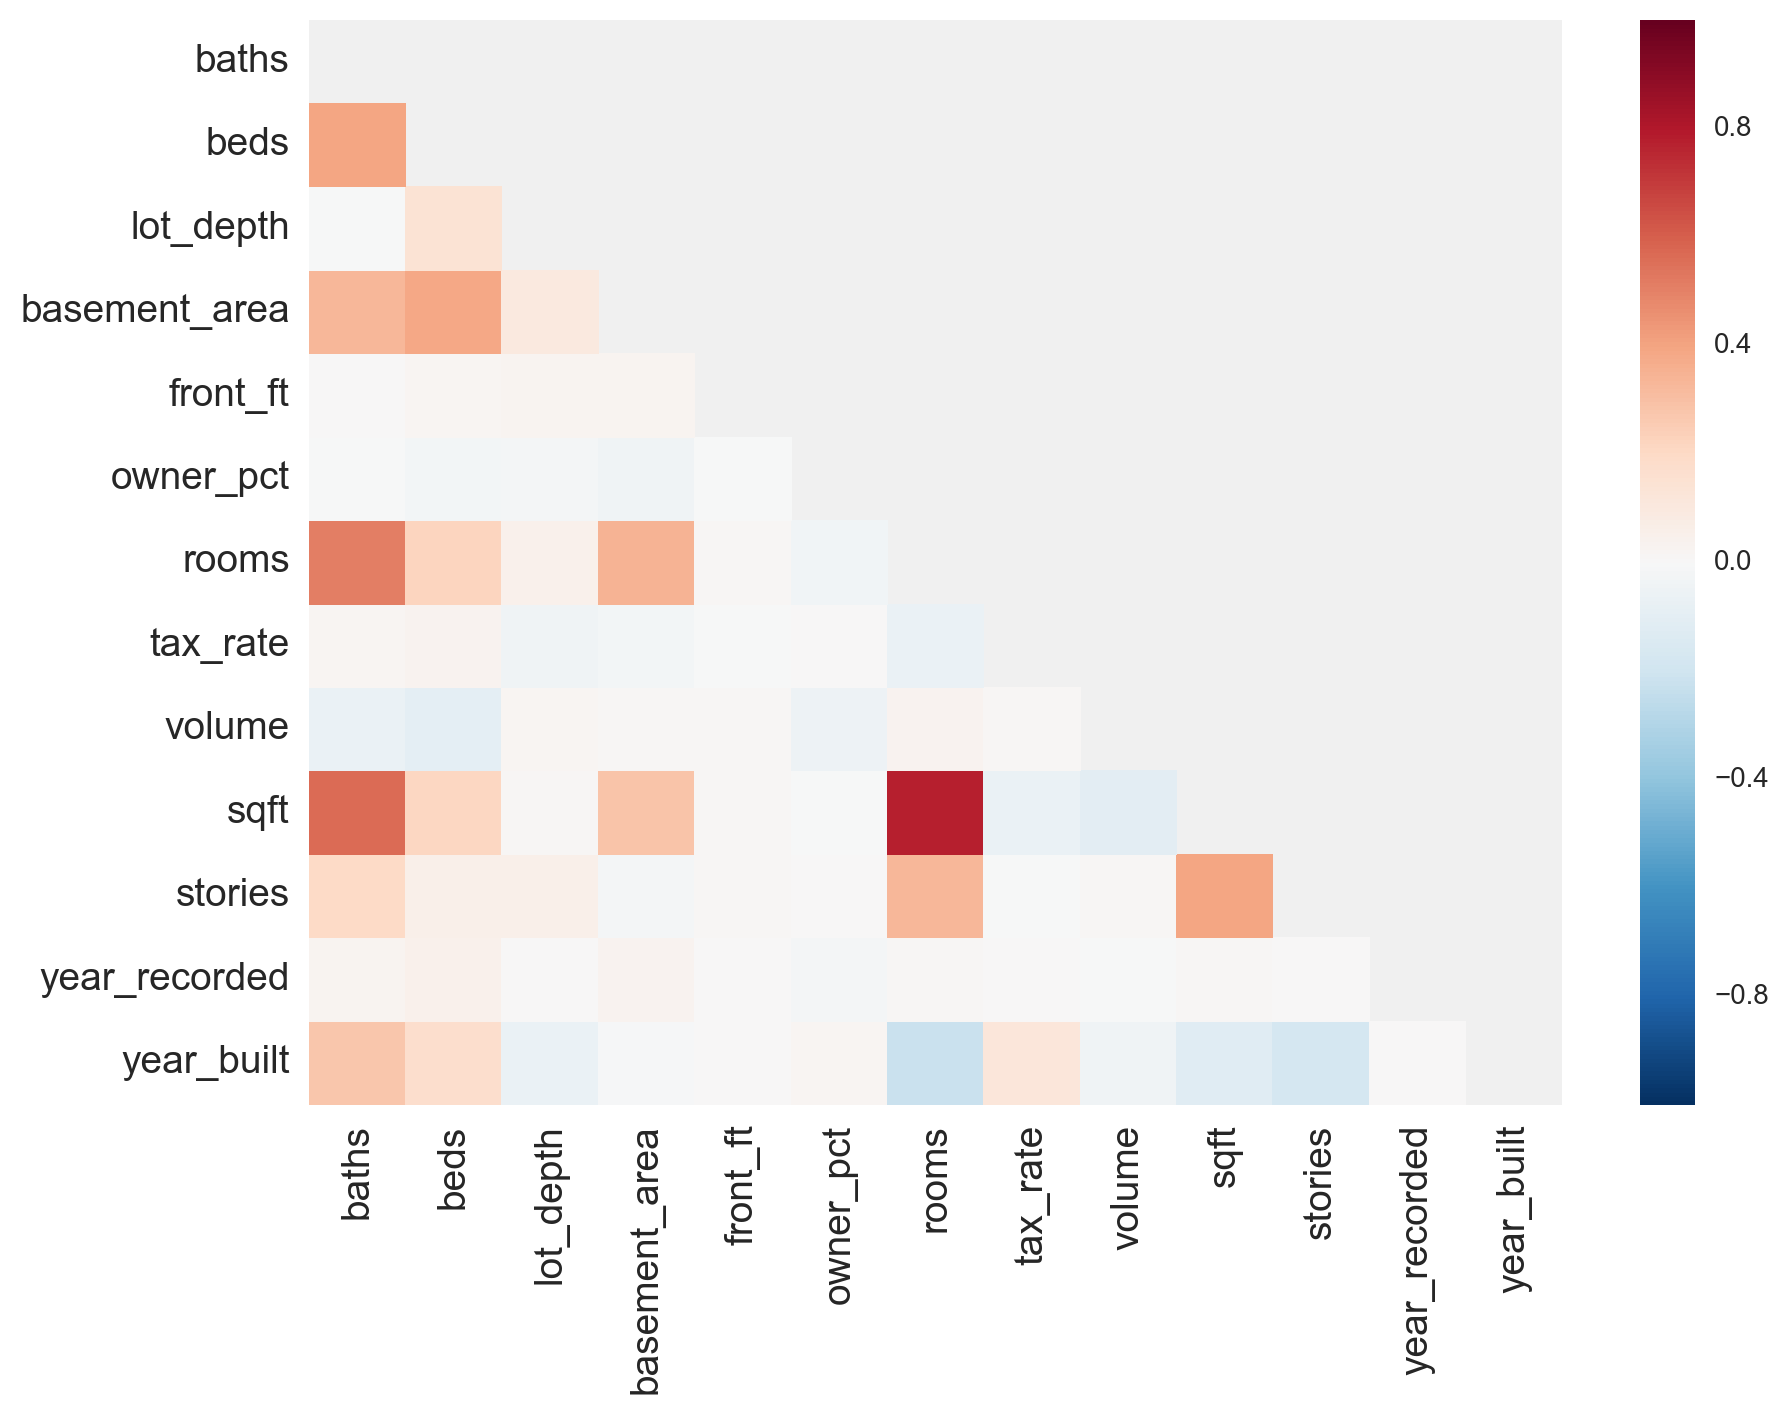

In [58]:
drop_cols = ['value', 'property_class', 'neighborhood', 'zone']
cols = [n for n in sf.columns if n not in drop_cols]
df_l = sf[cols]
df_l_corr = df_l.corr()

# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_l_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df_l_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [4]:
"""
1: 
This data set includes the Office of the Assessor-Recorder’s secured property 
tax roll spanning from 2007 to 2015. 

It includes all legally disclosable information, including location of property, 
value of property, the unique property identifier, and specific property characteristics. 

The data is used to accurately and fairly appraise all taxable property 
in the City and County of San Francisco. 

The Office of the Assessor-Recorder makes no representation or 
warranty that the information provided is accurate and/or 
has no errors or omissions. 
Please see the attached documentation under About for more.
"""
 
# Put another way, this data provides context around the valuation of a property. They can then tax this number.

'\n1: \nThis data set includes the Office of the Assessor-Recorder\xe2\x80\x99s secured property \ntax roll spanning from 2007 to 2015. \n\nIt includes all legally disclosable information, including location of property, \nvalue of property, the unique property identifier, and specific property characteristics. \n\nThe data is used to accurately and fairly appraise all taxable property \nin the City and County of San Francisco. \n\nThe Office of the Assessor-Recorder makes no representation or \nwarranty that the information provided is accurate and/or \nhas no errors or omissions. \nPlease see the attached documentation under About for more.\n'

In [ ]:
"""
2:
"""
# There was a really big amount of 0 bedroom units valued at roughly 30K. I would have looked at those more if I had more time. 

In [ ]:
# sf.groupby('beds').size()
# # The median square feet for beds == 0 is 1300; it is less at 776 for 1 beds
# # sf.groupby('beds').describe()

In [ ]:
# No Null Values:
# sf.isnull().sum(axis = 0)

In [ ]:
# sf.head()
# sf.tail()
# sf.describe()
# sf.dtypes

In [ ]:
"""
3:
"""
# Price of house goes up with higher bedrooms, bathrooms, and square feet. 


In [ ]:
"""
4: Create some initial visualizations on the portions of the data relevant to your hypothesis.
"""

# I made some basic graphs, I just cant remember where I put them. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [46]:
# Set X,y Data:
X = sf[['rooms','baths','beds','sqft','stories']]
y = sf['value'].values 

lm = LinearRegression() #linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)


In [ ]:
### TEST / TRAIN SPLIT ###

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tts_lm = LinearRegression()

tts_lm.fit(X_train, y_train)

tts_lm.score(X_test, y_test)


0.14158023541220421

In [ ]:
### K-Folds (using cross_val_score)###

In [49]:
kf_lm = LinearRegression()
scores = cross_val_score(kf_lm, X, y, cv = 5)
scores

array([ 0.11545037,  0.13405409,  0.127648  ,  0.15883632,  0.15729153])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

1) It means your model doesnt fit well.  

2) R2 can only be negative on new data because you have built a model that constrains the intercept or slope and fits the new data poorly.
Think of a line with an intercept well above the data that is forced into a negative slope. 
Otherwise squaring the correlation gives you a positive number.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [ ]:
I spun my wheels a lot on this one and did not come close to figuring it out.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [ ]:
I spun my wheels a lot on this one and did not come close to figuring it out.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [53]:
## Lasso ##

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xn, y)

lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, Xn, y, cv=10)

lasso.fit(Xn, y)

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

,abs_coef,coef,variable
3,128155.788957,128155.788957,sqft
0,81667.032399,-81667.032399,rooms
2,67233.934355,67233.934355,beds
1,36953.810916,36953.810916,baths
4,13497.221455,13497.221455,stories


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

In [54]:
# http://localhost:8888/notebooks/DSI-SF-5/curriculum/week-04/logistic_regression/2.2_logistic-ROC-knn-lab-solutions.ipynb
        

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


In [ ]:
### What biases are being caused here? ###
    # Bias Due to Unrepresentative Samples. The gift given to the app sender does not represent the broader population of food app users. 
    # You can not compare the 'gifted' vs 'non-gifted' populations against each other. 

In [ ]:
### How would you measure the success of such a program? ###
    # Measure app usage after incentives disappear.

In [ ]:
### Rephrase this question to be unbiased: 
    # Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree?
        # This phrasing is leading respondents to a stricter weapons laws position. Neutral language, such as
        # "What are your current thoughts on weapons laws: need to increase accessibility, just right, or need stricter laws?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [6]:
health = pd.read_csv('C:/Users/Brian/Desktop/health_data.csv')

In [25]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
AGE       200 non-null int64
HEIGHT    200 non-null int64
WEIGHT    200 non-null int64
CHOL      200 non-null int64
SMOKE     200 non-null object
BLOOD     200 non-null object
MORT      200 non-null object
dtypes: int64(4), object(3)
memory usage: 11.0+ KB


In [ ]:
# Description of columns:
Age, Height, Weight all describe basic outward appearance factors of people. These data are ints. 
Cholesterol is fat in the blood, I think, and is an internal health factor. Also an int. 
Smoke is whether or not they smoke, and if they do pipe or cigar.
Blood is blood type.
Mort is whether they are alive or dead. 

In [7]:
health.describe()

,AGE,HEIGHT,WEIGHT,CHOL
count,200.000000,200.00000,200.000000,200.000000
mean,35.715000,172.35000,75.885000,233.600000
std,9.604426,6.77399,10.442076,44.766732
min,18.000000,156.00000,53.000000,107.000000
25%,28.750000,168.00000,68.750000,204.000000
50%,37.000000,172.00000,75.000000,232.000000
75%,42.000000,176.00000,82.000000,259.000000
max,58.000000,191.00000,110.000000,455.000000


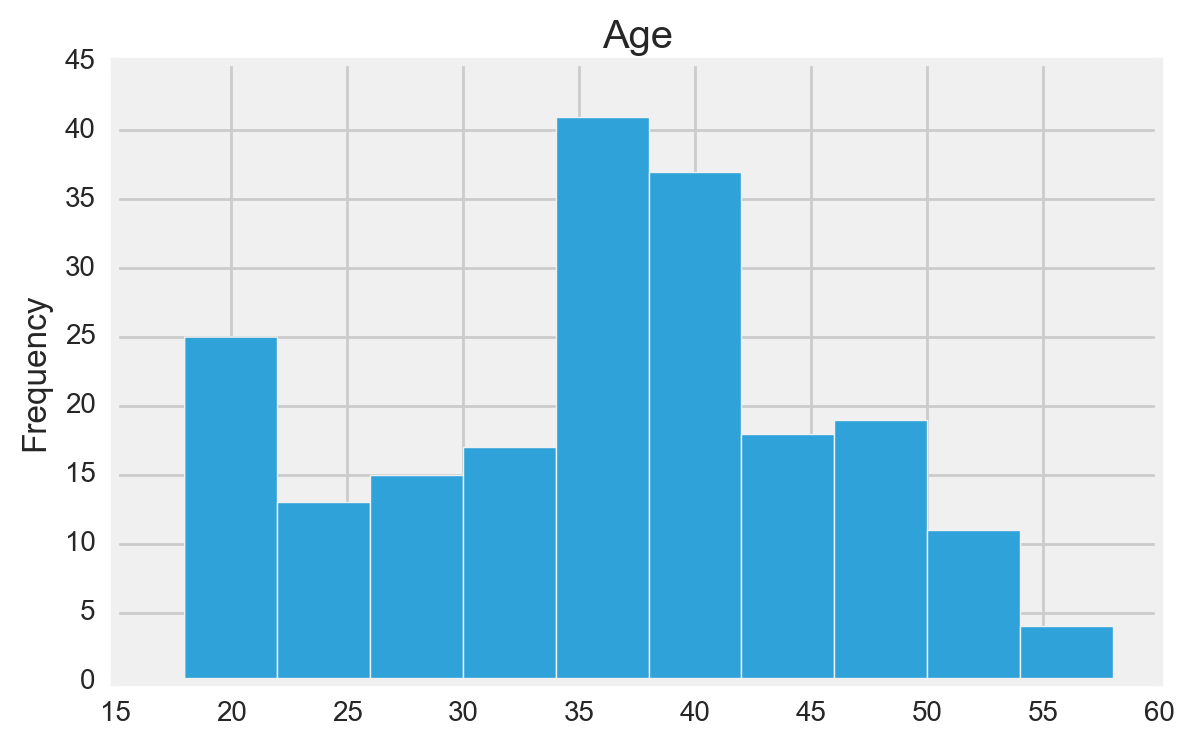

In [13]:
health['AGE'].plot.hist(title = 'Age');

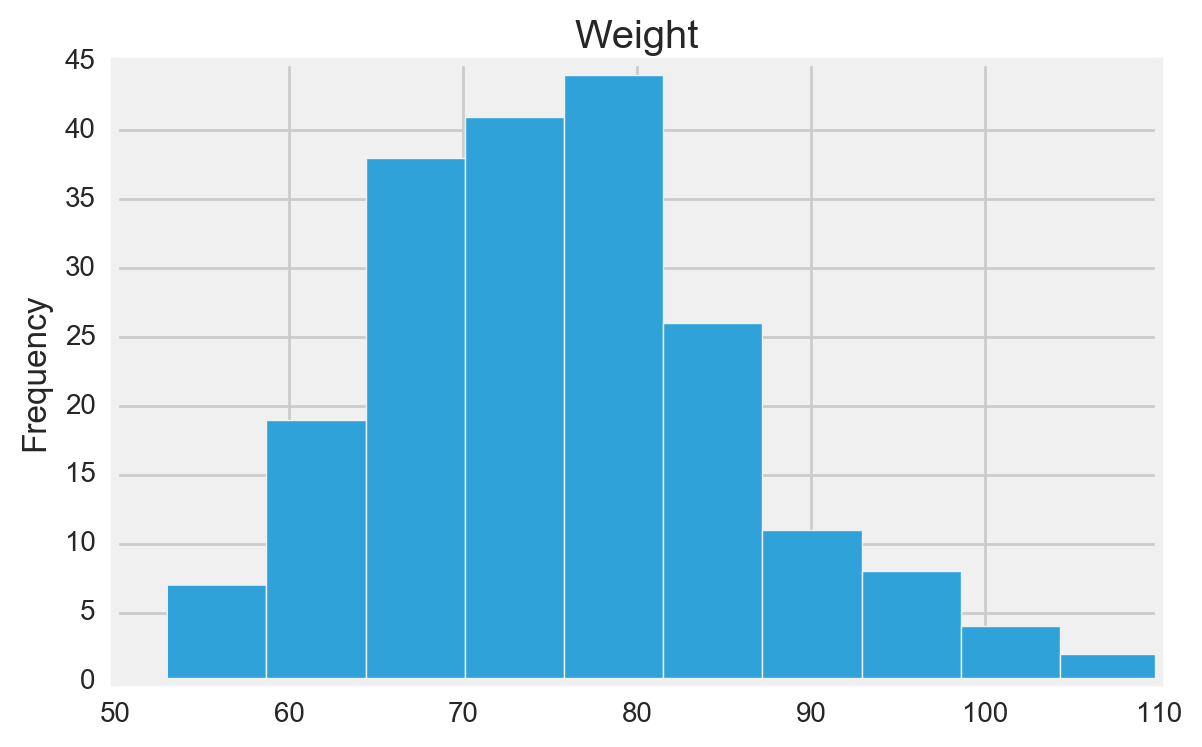

In [14]:
health['WEIGHT'].plot.hist(title = 'Weight');

In [ ]:
# Confidence Intervals / CDF

In [15]:
normal = stats.norm(0,1)
alpha = 0.05
upper = normal.ppf(1-alpha/2.)
lower = normal.ppf(alpha/2.)

In [16]:
mean_weight = np.mean(health.WEIGHT)
weight_sem = np.std(health.WEIGHT)/np.sqrt(len(health.WEIGHT))
weight_lower = mean_weight + lower*weight_sem
weight_upper = mean_weight + upper*weight_sem

In [18]:
print mean_weight, lower, upper, weight_sem, len(health.WEIGHT)

75.885 -1.95996398454 1.95996398454 0.736518075135 200


In [19]:
print weight_lower, mean_weight, weight_upper

74.4414510988 75.885 77.3285489012


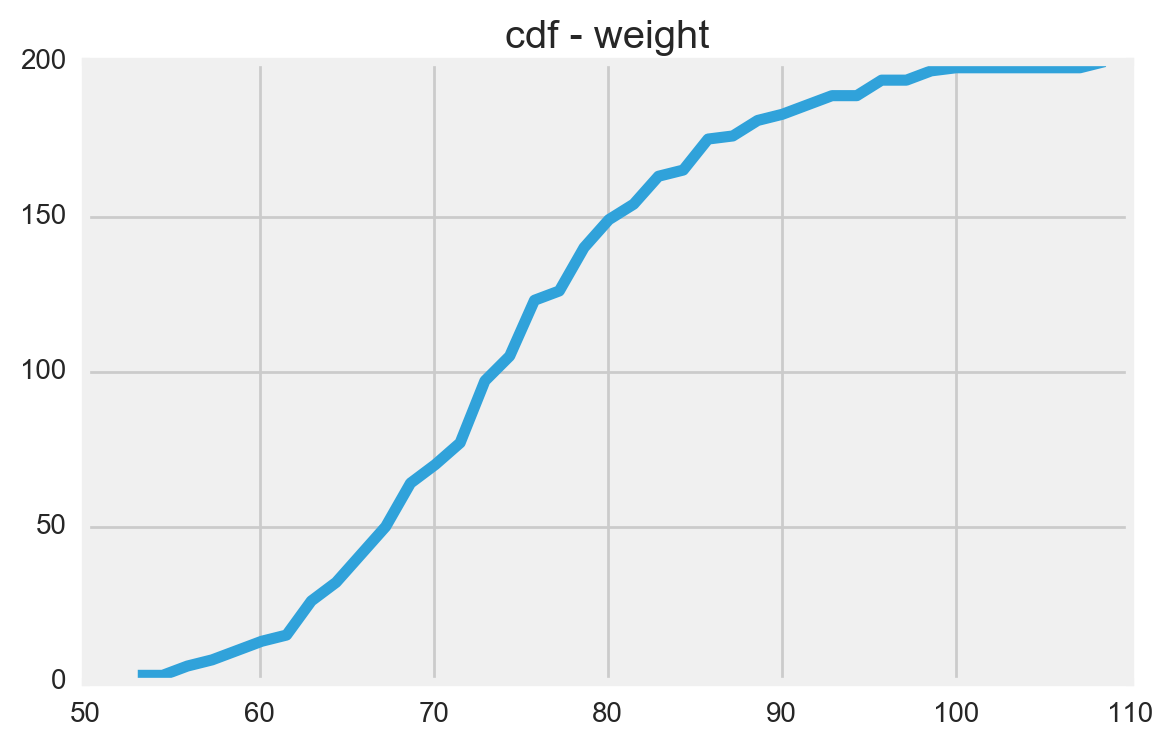

In [20]:
values, base = np.histogram(health.WEIGHT, bins=40)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative);
plt.title('cdf - weight');

In [ ]:
# Age

In [21]:
mean_age = np.mean(health.AGE)
age_sem = np.std(health.AGE)/np.sqrt(len(health.AGE))
age_lower = mean_age + lower*age_sem
age_upper = mean_age + upper*age_sem


In [22]:
print mean_age, lower, upper, age_sem, len(health.AGE)

35.715 -1.95996398454 1.95996398454 0.677435513536 200


In [23]:
print age_lower, mean_age, age_upper

34.3872507916 35.715 37.0427492084


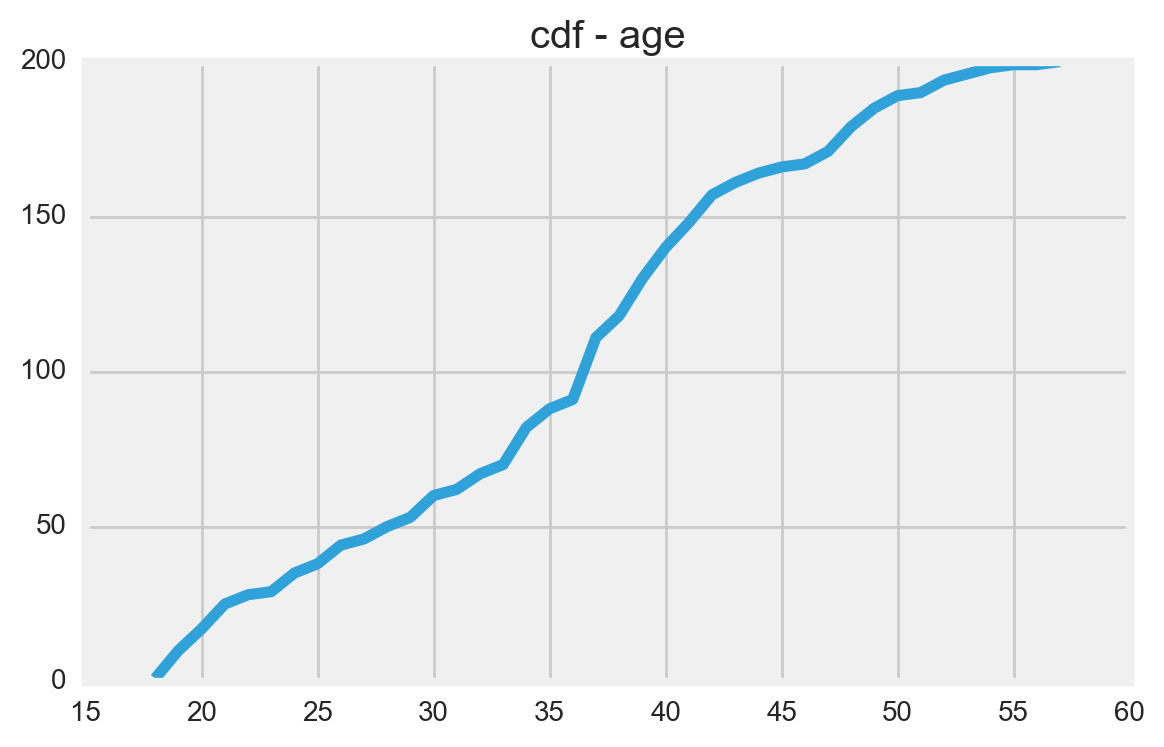

In [37]:
values, base = np.histogram(health.AGE, bins=40)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative);
plt.title('cdf - age');

In [24]:
# Correlation Matrix
health.corr()

,AGE,HEIGHT,WEIGHT,CHOL
AGE,1.000000,-0.274894,0.053034,0.454691
HEIGHT,-0.274894,1.000000,0.491970,-0.287539
WEIGHT,0.053034,0.491970,1.000000,-0.034337
CHOL,0.454691,-0.287539,-0.034337,1.000000


In [ ]:
# Is there a difference in mortality between smokers, nonsmokers?

In [28]:
health['SMOKE'] = health['SMOKE'].replace('nonsmo',0)
health['SMOKE'] = health['SMOKE'].replace('sigare',1)
health['SMOKE'] = health['SMOKE'].replace('pipe',1)

In [29]:
dead_smokers_age = health[(health.MORT == 'dead') & (health.SMOKE == 1)].AGE.values
dead_non_smokers_age = health[(health.MORT == 'dead') & (health.SMOKE == 0)].AGE.values

In [31]:
stats.ttest_ind(dead_smokers_age, dead_non_smokers_age)

Ttest_indResult(statistic=1.0306894822459547, pvalue=0.31388516816158768)

In [ ]:
Smoker and non-smoker mortality are similar. The large p-value means we cannot reject the null hypothesis of similar mortality.

In [ ]:
# If national average weight is 85 pounds, is our weight average significantly different?

In [ ]:
Yes, different than 85. Both ends of the confidence intervals are in the 70s. 
Also, small p value below means we can reject null that the ages are similar. 

In [34]:
stats.ttest_1samp(health.WEIGHT.values, 85)

Ttest_1sampResult(statistic=-12.344821194685455, pvalue=2.2901936138582111e-26)

In [ ]:
# Wasn't sure about the one sided test

In [ ]:
Until now, we’ve only asked is it different. This is called a two sided test.
What if we want to know if its less than or greater than? This is called a one sided test. 
We can calculate this from the result of a two sided. You divide your p value in half 
and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
If national average weight is 85 pounds, is our weight average statistical significantly less?